In [162]:
#import 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [163]:
#
df = pd.read_csv('dataset/mushrooms.csv')
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [164]:
X_df , y_df = df.iloc[:  , :-1] , df.iloc[: , -1]

In [165]:
from sklearn.manifold import TSNE 
model  = TSNE(perplexity= 10 , learning_rate=  4 )

In [166]:
pre_uniq  = {}
uniq = {}
for i in df.columns:
    pre_uniq = { f'{i}'  : list(df[i].unique()) }
    uniq.update(pre_uniq)

In [167]:
# just for checking  and get more idea's what we can do 
uniq

{'class': ['p', 'e'],
 'cap-shape': ['x', 'b', 's', 'f', 'k', 'c'],
 'cap-surface': ['s', 'y', 'f', 'g'],
 'cap-color': ['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r'],
 'bruises': ['t', 'f'],
 'odor': ['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'],
 'gill-attachment': ['f', 'a'],
 'gill-spacing': ['c', 'w'],
 'gill-size': ['n', 'b'],
 'gill-color': ['k', 'n', 'g', 'p', 'w', 'h', 'u', 'e', 'b', 'r', 'y', 'o'],
 'stalk-shape': ['e', 't'],
 'stalk-root': ['e', 'c', 'b', 'r', '?'],
 'stalk-surface-above-ring': ['s', 'f', 'k', 'y'],
 'stalk-surface-below-ring': ['s', 'f', 'y', 'k'],
 'stalk-color-above-ring': ['w', 'g', 'p', 'n', 'b', 'e', 'o', 'c', 'y'],
 'stalk-color-below-ring': ['w', 'p', 'g', 'b', 'n', 'e', 'y', 'o', 'c'],
 'veil-type': ['p'],
 'veil-color': ['w', 'n', 'o', 'y'],
 'ring-number': ['o', 't', 'n'],
 'ring-type': ['p', 'e', 'l', 'f', 'n'],
 'spore-print-color': ['k', 'n', 'u', 'h', 'w', 'r', 'o', 'y', 'b'],
 'population': ['s', 'n', 'a', 'v', 'y', 'c'],
 'habitat': ['u'

In [168]:
#class is our final desicion ... i.t either ediable or poisonous thus 
X = df.drop(columns= 'class')
y = df['class']
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [169]:
#printing how many uniq value on each columns 
for i in X.columns:
    print(i  ,  'Unique' , len(df[i].unique()))

cap-shape Unique 6
cap-surface Unique 4
cap-color Unique 10
bruises Unique 2
odor Unique 9
gill-attachment Unique 2
gill-spacing Unique 2
gill-size Unique 2
gill-color Unique 12
stalk-shape Unique 2
stalk-root Unique 5
stalk-surface-above-ring Unique 4
stalk-surface-below-ring Unique 4
stalk-color-above-ring Unique 9
stalk-color-below-ring Unique 9
veil-type Unique 1
veil-color Unique 4
ring-number Unique 3
ring-type Unique 5
spore-print-color Unique 9
population Unique 6
habitat Unique 7


In [170]:
X.shape

(8124, 22)

In [171]:
#drop columns containing less than 1 categories values 
for i in X.columns :
    if len(X[i].unique()) < 2 :
        X.drop(columns=i , inplace = True )

In [172]:
X.shape

(8124, 21)

In [173]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [174]:
#mapping 
mapping = {'p' : 1  , 'e' :0 }
y = y.map(mapping)


In [175]:
# every data here is nominal thus we can apply one hot encooding to this 
from sklearn.preprocessing import OneHotEncoder 
encoder = OneHotEncoder(sparse_output  = False  )
cat_X  = encoder.fit_transform(X)
cat_X

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [176]:
new_df = pd.DataFrame(cat_X , columns= encoder.get_feature_names_out())
new_df

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8120,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8121,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8122,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [177]:

from sklearn.manifold import TSNE 
tsne = TSNE(perplexity= 15 , n_iter= 1000 , n_components= 2 )

In [178]:
model = tsne.fit_transform(new_df)
model 

array([[-39.052135 , -54.77431  ],
       [-46.80203  , -28.009119 ],
       [-49.23182  , -35.99331  ],
       ...,
       [ 32.364407 , -56.48289  ],
       [ 56.09065  ,   3.3166537],
       [ 32.435314 , -59.925568 ]], dtype=float32)

In [179]:
model.shape

(8124, 2)

(8124, 2)

In [180]:

test = np.vstack((model.T , y ))

(3, 8124)

In [182]:
tsne_df = pd.DataFrame(test_1  , columns=['dim1' , 'dim2' , 'class'])

In [183]:
tsne_df

,dim1,dim2,class
0,-39.640640,-56.523178,1.0
1,-41.127350,-23.397074,0.0
2,-50.740124,-32.545895,0.0
3,-31.908812,-57.354038,1.0
4,-0.189461,-27.975241,0.0
...,...,...,...
8119,29.340515,-56.518211,0.0
8120,26.385529,-63.343452,0.0
8121,27.300095,-56.144215,0.0
8122,16.155695,-9.945710,1.0


<Axes: xlabel='dim1', ylabel='dim2'>

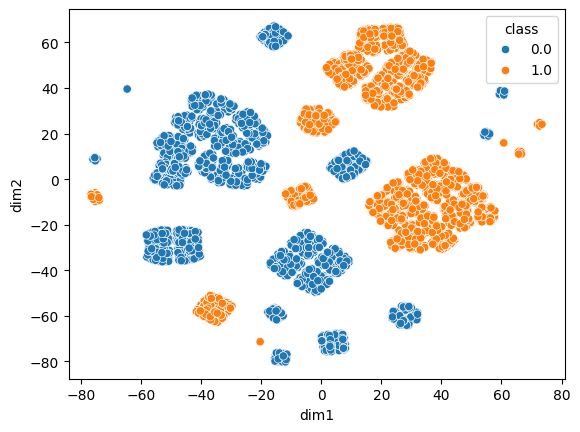

In [184]:
sns.scatterplot(data=tsne_df, hue='class', x='dim1', y='dim2')

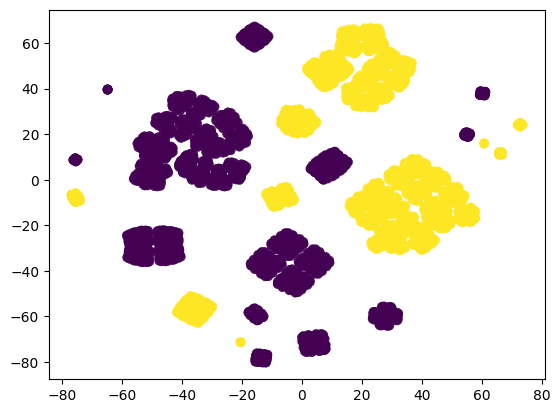

In [185]:
plt.scatter(tsne_df.iloc[: , 0] , tsne_df.iloc[: , 1 ]  , c = np.ravel(y)  , alpha = 0.4 )

In [186]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64